In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nobel_df = pd.read_csv('nobel.csv')
nobel_df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
nobel_df.shape

(1000, 18)

In [4]:
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [5]:
nobel_df.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [6]:
nobel_df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [16]:
# what is the most commonly awarded gender and birth country??
top_gender = nobel_df['sex'].value_counts().idxmax()
top_country = nobel_df['birth_country'].value_counts().idxmax()

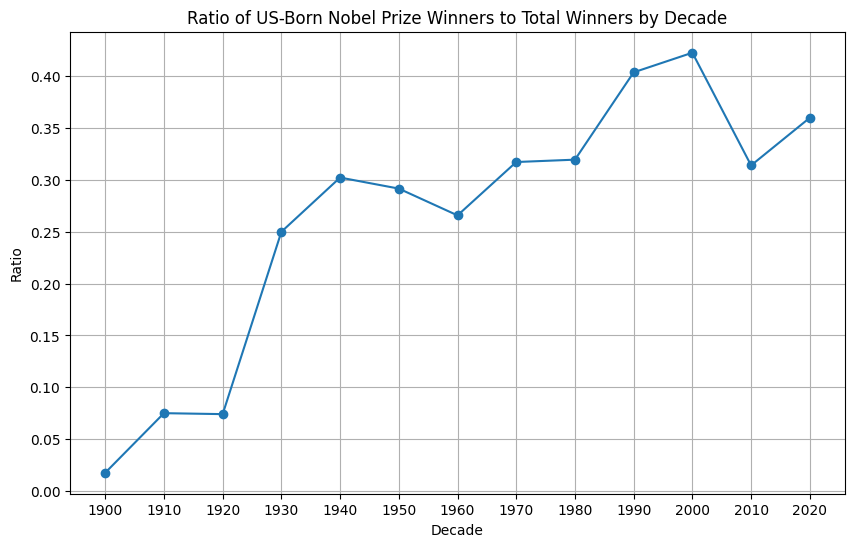

Decade with the highest ratio of US-born Nobel Prize winners to total winners: 2000


In [11]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

# Create a column indicating whether the winner was born in the United States
nobel_df['us_born'] = nobel_df['birth_country'] == 'United States of America'

# Convert 'year' column to numeric type
nobel_df['year'] = pd.to_numeric(nobel_df['year'], errors='coerce')

# Create a column to represent the decade of the Nobel Prize
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# Group the data by decade and calculate the ratio of US-born winners to total winners for each decade
decade_ratios = nobel_df.groupby('decade')['us_born'].mean()

# Identify the decade with the highest ratio of US-born winners
max_decade_usa = decade_ratios.idxmax()

# Plot the trwd of the ratio over decades
decade_ratios.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Ratio of US-Born Nobel Prize Winners to Total Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('Ratio')
plt.grid(True)
plt.xticks(decade_ratios.index)
plt.show()

print("Decade with the highest ratio of US-born Nobel Prize winners to total winners:", max_decade_usa)

In [12]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
female_laureates_per_decade = nobel_df[nobel_df['sex'] == 'Female'].groupby(['decade', 'category']).size()
total_laureates_per_decade = nobel_df.groupby(['decade', 'category']).size()
female_ratio_per_decade = female_laureates_per_decade / total_laureates_per_decade
max_female_dict = {female_ratio_per_decade.idxmax()[0]: female_ratio_per_decade.idxmax()[1]}

In [13]:
# Who was the first woman to receive a Nobel Prize, and in what category?
first_woman = nobel_df[nobel_df['sex'] == 'Female'].sort_values('year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

In [14]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?
repeat_list = nobel_df['full_name'].value_counts()[nobel_df['full_name'].value_counts() > 1].index.tolist()

In [17]:
# Printing the results
print("Most commonly awarded gender:", top_gender)
print("Most commonly awarded birth country:", top_country)
print("Decade with the highest ratio of US-born Nobel Prize winners:", max_decade_usa)
print("Decade and Nobel Prize category with the highest proportion of female laureates:", max_female_dict)
print("First woman to receive a Nobel Prize:", first_woman_name, "in category:", first_woman_category)
print("Individuals or organizations that have won more than one Nobel Prize:", repeat_list)

Most commonly awarded gender: Male
Most commonly awarded birth country: United States of America
Decade with the highest ratio of US-born Nobel Prize winners: 2000
Decade and Nobel Prize category with the highest proportion of female laureates: {2020: 'Literature'}
First woman to receive a Nobel Prize: Marie Curie, née Sklodowska in category: Physics
Individuals or organizations that have won more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
